Using CLASS to calculate matter Power spectrum with cosmological parameters given by Creasey et. al. 2018

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
#from scipy.interpolate import InterpolatedUnivariateSpline as spline 

In [3]:
from classy import Class

In [4]:
path = "/home/je101/Desktop/GCs/ipynb/"
path2 = "/home/ngoc/Downloads/GCs"

In [5]:
#parameters from Creasey 18
LambdaCDM = Class()
# pass input parameters
z     = 0.0
tau   = 0.0925
n_s   = 0.9603
A_s   = 2e-9
h     = 0.673
omg_m = 0.315
omg_b = 0.022032
LambdaCDM.set({'omega_b'  :omg_b,
               'omega_cdm':omg_m-omg_b,
               'h'        :h,
               #'A_s'      :A_s,
               'sigma8'   : 0.829, 
               'n_s'      :n_s,
               'tau_reio' :tau,
               'z_pk'     :z,
               'YHe'  : 0.24672})
LambdaCDM.set({'output':'mPk','P_k_max_1/Mpc':1000.0})
# run class
LambdaCDM.compute()

In [6]:
f = LambdaCDM.scale_independent_growth_factor_f(z)
D = LambdaCDM.scale_independent_growth_factor(z)
print(f,D)

0.8194801721464393 1.0


In [7]:
kbins = 1000
kk = np.logspace(-6, 3, kbins)# k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3

In [8]:
#convert the unit of k[h/Mpc]->k[Mpc] then find P[h-1.Mpc]^3 
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) 

Text(0, 0.5, 'P(k)[$(h^{-1}Mpc)^3$]')

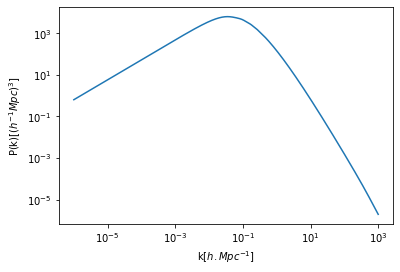

In [9]:
#plt.xlim(kk[0],kk[-1])
plt.loglog(kk, Pk)
#plt.ylim(1,)
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')

In [10]:
#Mill powerspectrum in mergertree code PCH
k_mill = np.loadtxt(path2+'/code/pk_Mill.dat', usecols =(0))
P_mill = np.loadtxt(path2+'/code/pk_Mill.dat', usecols =(1))

Using the parameters from Millennium to regenerate the result and compare with the Mill one to find what's wrong with CLASS

In [11]:
#check with Mill parameters
LambdaCDM = Class()
# pass input parameters
z      = 0.0
tau    = 0.0925
n_s    = 1 
A_s    = 2e-9
h      = 0.73 
omg_m  = 0.25 
sigma8 = 0.9
omg_b  = 0.045   # this value of omg_b is too high, CLASS requires to decrease it <= 0.038
LambdaCDM.set({'omega_b'  :omg_b,
               'omega_cdm':omg_m-omg_b,
               'h'        :h,
               #'A_s'      :A_s,
               'sigma8'   : sigma8,
               'n_s'      :n_s,
               'tau_reio' :tau,
               'z_pk'     :z,
                'YHe'  : 0.24672})
LambdaCDM.set({'output':'mPk','P_k_max_1/Mpc':100.0})
# run class
LambdaCDM.compute()

In [12]:
kbins = 1000
kk_Mill = np.logspace(-6, 2, kbins)# k in h/Mpc
Pk_Mill = [] # P(k) in (Mpc/h)**3

In [13]:
#convert the unit of k[h/Mpc]->k[Mpc] then find P[h-1.Mpc]^3 
for k in kk_Mill:
    Pk_Mill.append(LambdaCDM.pk(k*h,0.)*h**3) 

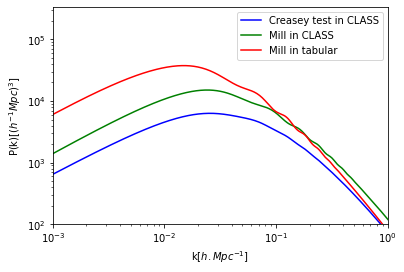

In [24]:
#plt.xlim(kk[0],kk[-1])
plt.loglog(kk, Pk,'b-', label='Creasey test in CLASS')
plt.loglog(kk_Mill, Pk_Mill,'g', label ='Mill in CLASS')
plt.loglog(k_mill, P_mill,'r', label ='Mill in tabular')
#plt.loglog(k_E, P_E,'--', label ='EAGLE')
#plt.loglog(k_WDM, P_WDM,'r:',label='WDM Dove')
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')
plt.xlim(1e-3,1)
plt.ylim(1e2,)
plt.legend()
#plt.savefig('Pk.png')
